In [6]:
import random
import os

import matplotlib.pyplot as plt
import numpy as np
import torch

from src.data.augmenters import NoAugmenter, EigenAugmenter, MyAugmenter
from src.data.patch_samplers import NoPatchSampler, EigenPatchSampler, MyPatchSampler
from src.data.kitti_raw import KITTIRAWDataset

from src.models import CoarseFine
from src.models import MyModel

In [7]:
kitti_path: str = '/media/antonio/523f31c5-dc82-4dce-8457-65b5dd1f19e4/kitti'

In [8]:
dataset = KITTIRAWDataset(
        NoAugmenter(),
        NoPatchSampler(),
        kitti_path,
        'train',
        'png',
)

In [9]:
model = MyModel(True, 0)
#checkpoint_path = os.path.join("experiments", "eigen","checkpoints","model_6.pth")
#model.load_state_dict(torch.load(checkpoint_path))

Working on device: cuda:0
Unbatching...
Computing the first predictions...
Detecting points of interest...
Found 7 points of interest

Working on point (282, 286)
Warp and crop...
Predict...
Unwarp...

Working on point (319, 193)
Warp and crop...
Predict...
Unwarp...

Working on point (325, 166)
Warp and crop...
Predict...
Unwarp...

Working on point (309, 223)
Warp and crop...
Predict...
Unwarp...

Working on point (295, 120)
Warp and crop...
Predict...
Unwarp...

Working on point (272, 86)
Warp and crop...
Predict...
Unwarp...

Working on point (248, 229)
Warp and crop...
Predict...
Unwarp...
Fine-tuining before blending...

Computing the final predictions...
Detecting points of interest...
Found 7 points of interest

Working on point (282, 286)
Warp and crop...
Predict...
Unwarp...

Working on point (319, 193)
Warp and crop...
Predict...
Unwarp...

Working on point (325, 166)
Warp and crop...
Predict...
Unwarp...

Working on point (309, 223)
Warp and crop...
Predict...
Unwarp...

Wo

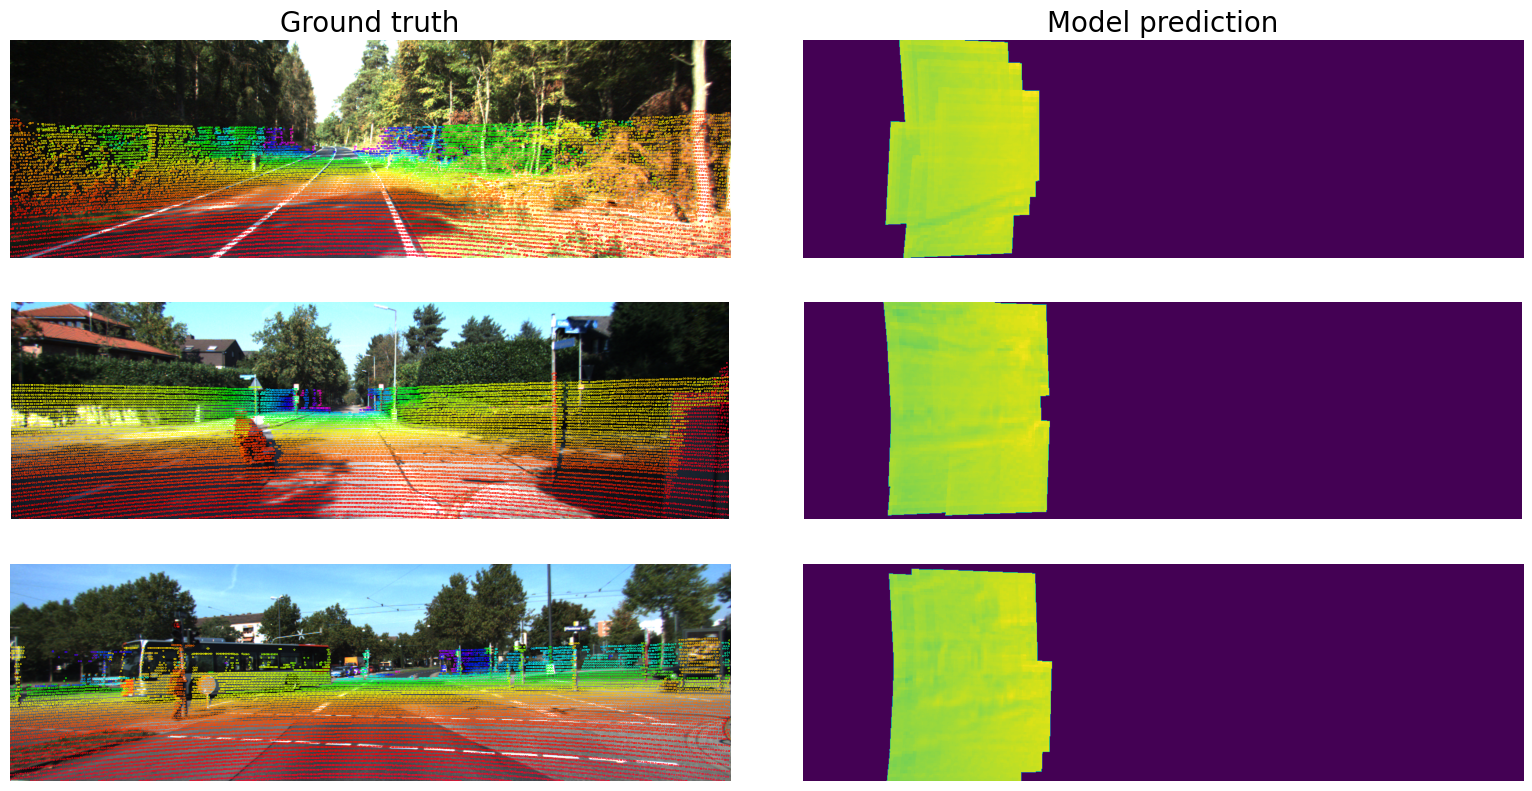

In [11]:
indices = random.choices(range(len(dataset)), k=6)
fig, axes = plt.subplots(3, 2, figsize=(16, 8))
plt.tight_layout()

axes[0, 0].set_title("Ground truth", fontsize=20)
axes[0, 1].set_title("Model prediction", fontsize=20)
for i in range(3):
    image, depth_map, camera_parameters = dataset[indices[i]]

    # To cuda
    image = image.to('cuda')
    for k in camera_parameters:
        camera_parameters[k] = camera_parameters[k].to('cuda')

    np_image = image[0].cpu().permute(1, 2, 0).numpy()
    np_depth_map = depth_map[0, 0].cpu().numpy()

    yy, xx = np.nonzero(np_depth_map)

    axes[i, 0].axis("off")
    axes[i, 0].imshow(np_image)
    axes[i, 0].scatter(xx, yy, c=np_depth_map[yy, xx], s=0.1, cmap="gist_rainbow")

    model.eval()
    with torch.no_grad():
        pred = model(image, camera_parameters)
    np_pred = pred[0, 0].cpu().numpy()
    print(f"depth map ranges in {np_depth_map.min():.2f}, {np_depth_map.max():.2f}")
    print(f"predicted depth map ranges in {np_pred.min():.2f}, {np_pred.max():.2f}\n")

    axes[i, 1].axis("off")
    axes[i, 1].imshow(np_pred)
    #axes[i, 1].scatter(xx, yy, c=np_pred[yy, xx], s=0.1, cmap="gist_rainbow")

plt.show()